### Week2授業課題１　二次元配列と勾配問題

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=0) # ndarrayを常に省略

### 【問題1】1次関数

In [15]:
# x配列と1次関数からなるy配列を作る
x_array = np.arange(-50, 50.1, 0.1)
y_array = np.array(1/2*x_array + 1)
print(x_array)
print(x_array.shape)
print(y_array)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
(1001,)
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


### 【問題2】配列の結合

In [16]:
# x配列、y配列をreshape
x_array = x_array.reshape(1001, 1)
y_array = y_array.reshape(1001, 1)

# 配列を結合
xy_array = (np.concatenate([x_array, y_array], 1))
print(xy_array)
print(xy_array.shape)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


### 【問題3】勾配を求める

In [17]:
# xとyの変化量
x_difference = x_array[1:] - x_array[:-1]
y_difference = y_array[1:] - y_array[:-1]
# print(x_difference)

# 勾配
xy_gradient = y_difference/x_difference
print("各x座標における勾配：\n{}".format(xy_gradient))

各x座標における勾配：
[[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]


### 【問題4】グラフを描く

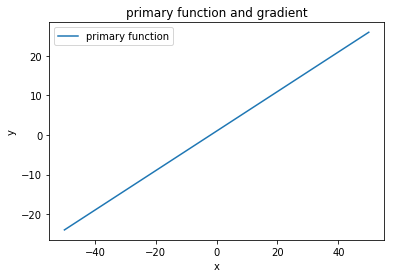

In [18]:
%matplotlib inline

# 1次関数のグラフ

plt.xlabel("x")
plt.ylabel("y")
plt.title("primary function and gradient")
plt.plot(x_array, y_array, label = "primary function")
plt.legend()
plt.show()

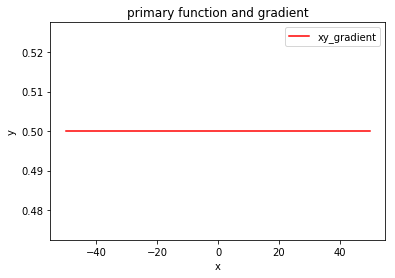

In [19]:
%matplotlib inline

# 勾配のグラフ

plt.xlabel("x")
plt.ylabel("y")
plt.title("primary function and gradient")
plt.plot(x_array[:-1], xy_gradient, color = "red", label = "xy_gradient")
plt.legend()
plt.show()

### 【問題5】Pythonの関数化

In [20]:
def compute_gradient(function, start = -50, stop = 50.1, step = 0.1):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
    """
    # X配列を用意
    array_x = np.arange(start, stop, step) # rangeをx_rangeで指定したい
    
    # X,yの配列をreshape
    array_x = array_x.reshape(len(array_x), 1)
    array_y = function(array_x)
    array_y.reshape(len(array_y), 1)
    
    # 配列を結合
    array_xy = (np.concatenate([array_x, array_y], 1))
    
    # xとyの変化量
    x_difference = array_x[1:] - array_x[:-1]
    y_difference = array_y[1:] - array_y[:-1]
    
    # 勾配
    gradient = y_difference/x_difference

    return array_x, array_y, gradient

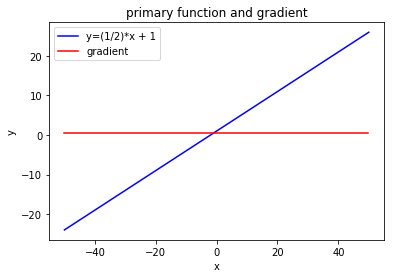

In [21]:
#1 y = (1/2)*x + 1の勾配
def function1(array_x):
    #y配列を用意
    array_y = np.array((1/2)*array_x + 1)
    return array_y

array_x_f1, array_y_f1, gradient_f1 = compute_gradient(function1)
#print(gradient_f1)
#print(array_x_f1)

%matplotlib inline

# yと勾配のグラフ

plt.xlabel("x")
plt.ylabel("y")
plt.title("primary function and gradient")
plt.plot(array_x_f1, array_y_f1, color = "blue", label = "y=(1/2)*x + 1")
plt.plot(array_x_f1[:-1], gradient_f1, color = "red", label = "gradient")
plt.legend()
plt.show()

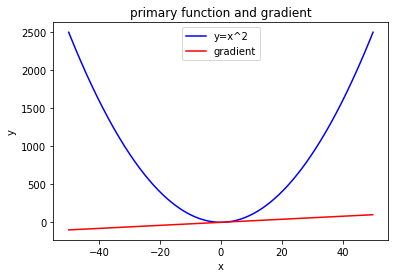

In [22]:
#2 y=x^2 の勾配

def function2(array_x):
    #y配列を用意
    array_y = np.array(array_x**2)
    return array_y

array_x_f2, array_y_f2, gradient_f2 = compute_gradient(function2)
#print(array_y_f2[:10])
#print(gradient_f2[:10])

%matplotlib inline

# y=x^2と勾配のグラフ

plt.xlabel("x")
plt.ylabel("y")
plt.title("primary function and gradient")
plt.plot(array_x_f2, array_y_f2, color = "blue", label = "y=x^2")
plt.plot(array_x_f2[:-1], gradient_f2, color = "red", label = "gradient")
plt.legend()
plt.show()

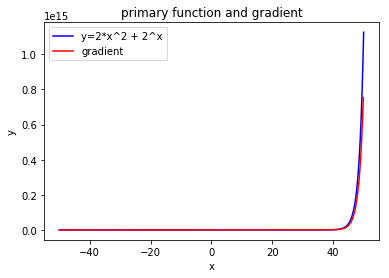

In [23]:
#3 y=2*x^2 + 2^x　の勾配

def function3(array_x):
    #y配列を用意
    array_y = np.array(2*array_x**2 + 2**array_x)
    return array_y

array_x_f3, array_y_f3, gradient_f3 = compute_gradient(function3, -50, 50.1, 0.1)

%matplotlib inline

# y=x^2と勾配のグラフ

plt.xlabel("x")
plt.ylabel("y")
plt.title("primary function and gradient")
plt.plot(array_x_f3, array_y_f3, color = "blue", label = "y=2*x^2 + 2^x")
plt.plot(array_x_f3[:-1], gradient_f3, color = "red", label = "gradient")
plt.legend()
plt.show()

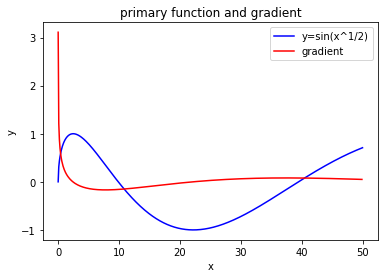

In [37]:
#4 y=sin(x^1/2)　の勾配

def function4(array_x):
    #y配列を用意
    array_y = np.sin(array_x ** (1/2))
    return array_y

array_x_f4, array_y_f4, gradient_f4 = compute_gradient(function4, 0, 50.1, 0.1)
#print(gradient_f4[:10,:10])
#print(array_x_f4)

%matplotlib inline

# y=x^2と勾配のグラフ

plt.xlabel("x")
plt.ylabel("y")
plt.title("primary function and gradient")
plt.plot(array_x_f4, array_y_f4, color = "blue", label = "y=sin(x^1/2)")
plt.plot(array_x_f4[:-1], gradient_f4, color = "red", label = "gradient")
plt.legend()
plt.show()

### 【問題6】最小値を求める

In [38]:
# y=x^2 の最小値

# minメソッド(最小値)
min_f2 = np.amin(array_y_f2)
print("y=x^2の最小値：{}".format(min_f2))

# argminメソッド(最小値のインデックス)
argmin_f2 = np.argmin(array_y_f2)
print("y=x^2の最小値のインデックス：{}".format(argmin_f2))

# 最小のyをとる前後の勾配
argmin_before_f2 = argmin_f2 - 1
argmin_next_f2 = argmin_f2 + 1
print("最小値の前の勾配：{}".format(gradient_f2[argmin_before_f2]))
print("最小値の後の勾配：{}".format(gradient_f2[argmin_next_f2]))

y=x^2の最小値：5.048709793414476e-25
y=x^2の最小値のインデックス：500
最小値の前の勾配：[-0.1]
最小値の後の勾配：[0.3]


In [39]:
# y=2*x^2 + 2^x の最小値

# minメソッド(最小値)
min_f3 = np.amin(array_y_f3)
print("y=2*x^2 + 2^xの最小値：{}".format(min_f3))

# argminメソッド(最小値のインデックス)
argmin_f3 = np.argmin(array_y_f3)
print("y=2*x^2 + 2^xの最小値のインデックス：{}".format(argmin_f3))

# 最小のyをとる前後の勾配
argmin_before_f3 = argmin_f3 - 1
argmin_next_f3 = argmin_f3 + 1
print("最小値の前の勾配：{}".format(gradient_f3[argmin_before_f3]))
print("最小値の後の勾配：{}".format(gradient_f3[argmin_next_f3]))

y=2*x^2 + 2^xの最小値：0.9505505632959851
y=2*x^2 + 2^xの最小値のインデックス：498
最小値の前の勾配：[-0.41701833]
最小値の後の勾配：[0.46967008]


In [40]:
# y=sin(x^1/2) の最小値

# minメソッド(最小値)
min_f4 = np.amin(array_y_f4)
print("function4(y=sin(x^1/2))の最小値：{}".format(min_f4))

# argminメソッド(最小値のインデックス)
argmin_f4 = np.argmin(array_y_f4)
print("function4(y=sin(x^1/2))の最小値のインデックス：{}".format(argmin_f4))

# 最小のyをとる前後の勾配
argmin_before_f4 = argmin_f4 - 1
argmin_next_f4 = argmin_f4 + 1
print("最小値の前の勾配：{}".format(gradient_f4[argmin_before_f4]))
print("最小値の後の勾配：{}".format(gradient_f4[argmin_next_f4]))

function4(y=sin(x^1/2))の最小値：-0.9999997540298113
function4(y=sin(x^1/2))の最小値のインデックス：222
最小値の前の勾配：[-0.00063884]
最小値の後の勾配：[0.00160612]
